**Life cycle of Machine Learning Project**

1) Understanding the problem statement.

2) Collecting the data.

3) EDA

4) Data Cleaning

5) Data Pre-Processing

6) Model Training

7) Model selection

**The Problem Statement**

The dataset is about predicting whether the person is diabetic or non-diabetic. This decision is taken on the basis of several features.

**Aim** 

Training the machine learning model to predict a person to be diabetic or non diabetic in an automated manner.

**This is a Classification problem.** 

importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import sklearn
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

Importing dataset

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**Attributes**

**The dataset contains records for females only**

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1)



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


It appears that there are no missing entries in the dataset.

In [5]:
for col in df.columns:
  count = (df[col] == 0).sum()
  print(col,count)

Pregnancies 111
Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0
Outcome 500


**The 0's in the** 

Glucose,  BMI,  Blood Pressure
columns need to be replaced .

In [6]:
dfc = df

In [7]:
dfc["BMI"].replace(to_replace = 0,value = dfc["BMI"].mean(),inplace = True)

In [8]:
dfc["Glucose"].replace(to_replace = 0,value = dfc["Glucose"].mean(),inplace = True)

In [9]:
dfc["BloodPressure"].replace(to_replace = 0,value = dfc["BloodPressure"].mean(),inplace = True)

In [10]:
for col in dfc.columns:
  count = (dfc[col] == 0).sum()
  print(col,count)

Pregnancies 111
Glucose 0
BloodPressure 0
SkinThickness 227
Insulin 374
BMI 0
DiabetesPedigreeFunction 0
Age 0
Outcome 500


**The 0's in the** 

Glucose,  BMI,  Blood Pressure  column replaced .

**Co-relation**

In [11]:
dfc.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,-0.081672,-0.073535,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.074934,0.331190,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.020924,-0.038147,0.281231,0.000371,0.326740,0.162986
SkinThickness,-0.081672,0.074934,0.020924,1.000000,0.436783,0.381755,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331190,-0.038147,0.436783,1.000000,0.185365,0.185071,-0.042163,0.130548
BMI,0.021546,0.231478,0.281231,0.381755,0.185365,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.183928,0.185071,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,-0.113970,-0.042163,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.074752,0.130548,0.312254,0.173844,0.238356,1.000000


In [12]:
dfc.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,20.536458,79.799479,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,15.952218,115.244002,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


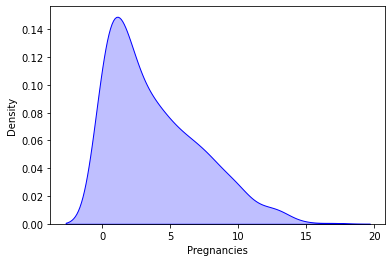

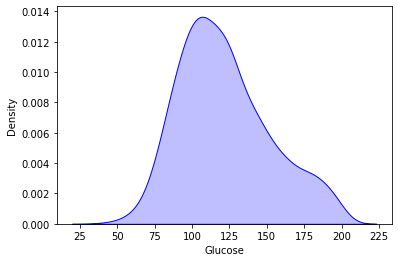

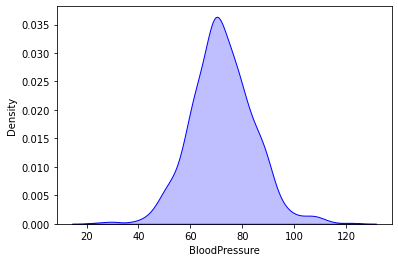

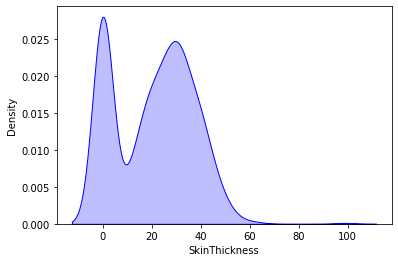

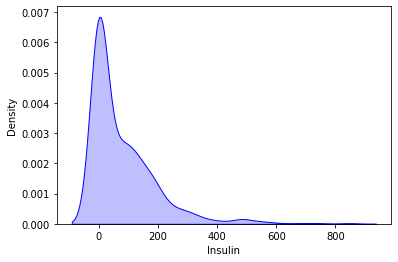

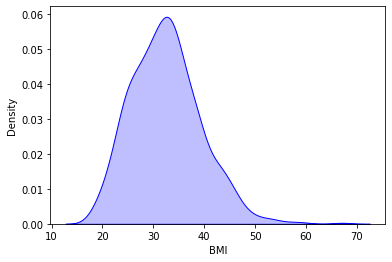

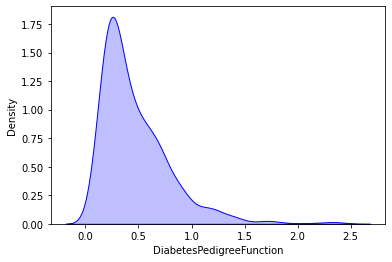

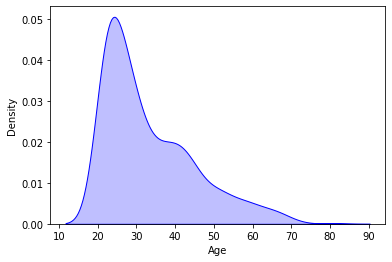

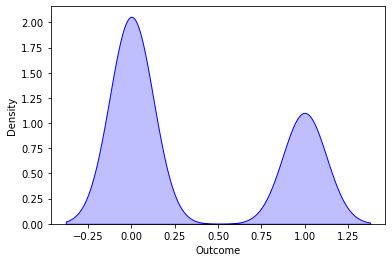

In [13]:
for i, col in enumerate(dfc.columns):
    plt.figure(i)
    sb.kdeplot(x=col, data=dfc,shade = True,color = "b")
    plt.show()

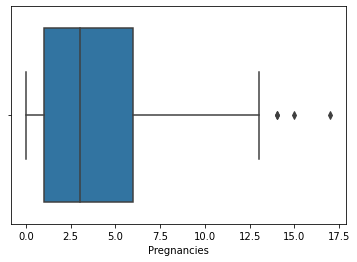

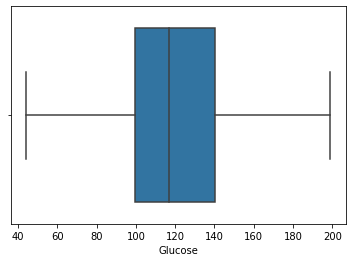

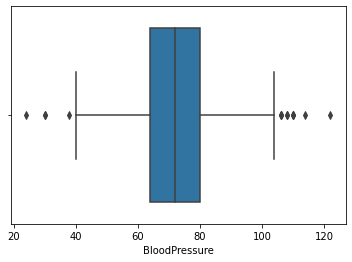

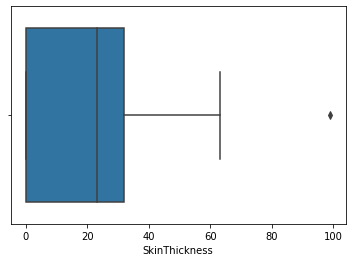

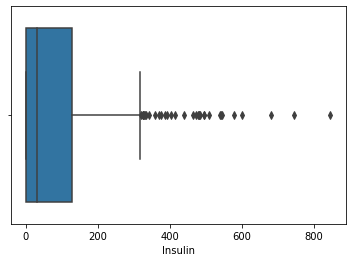

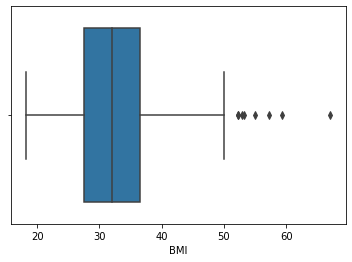

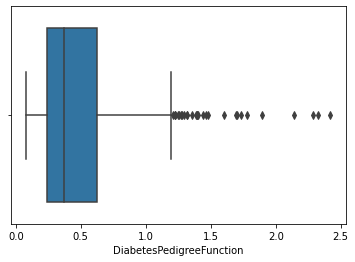

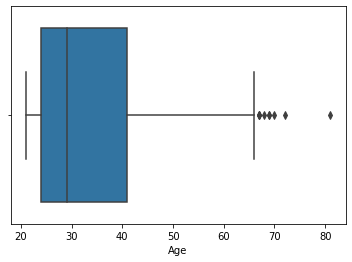

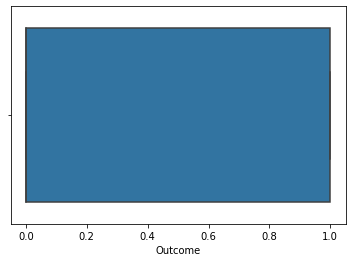

In [14]:
for i, col in enumerate(dfc.columns):
    plt.figure(i)
    sb.boxplot(x=dfc[col])
    plt.show()

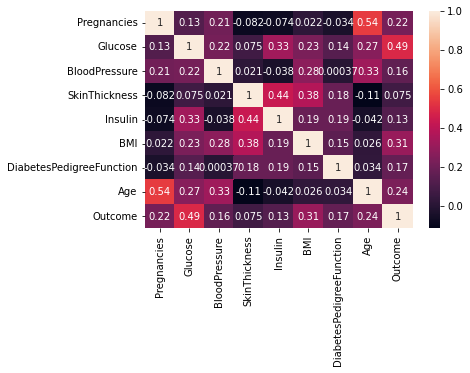

In [15]:
sb.heatmap(dfc.corr(),annot =True)

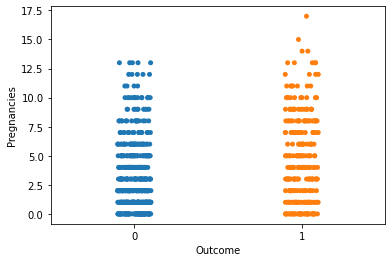

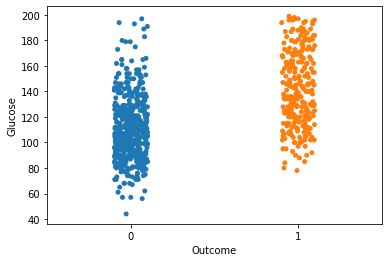

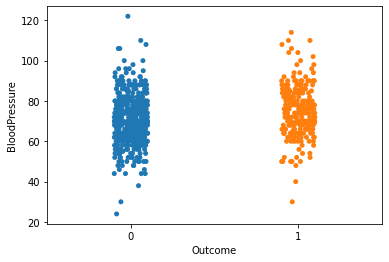

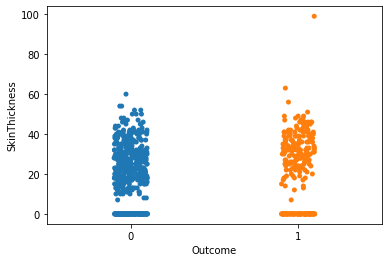

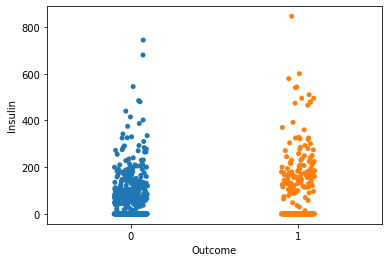

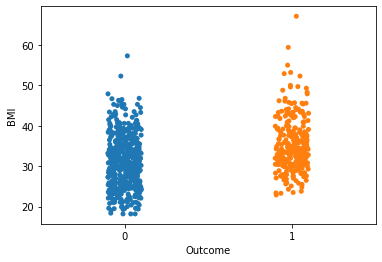

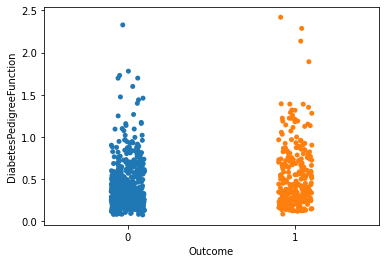

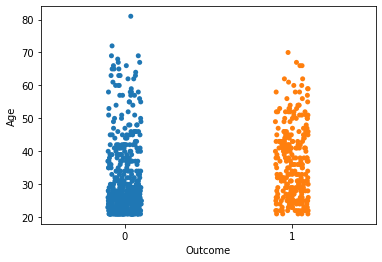

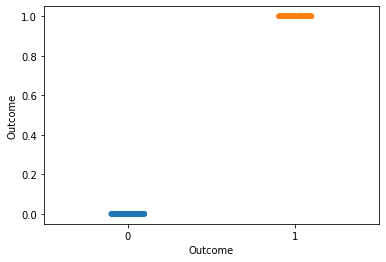

In [16]:
for i, col in enumerate(dfc.columns):
    plt.figure(i)
    sb.stripplot(x=dfc["Outcome"],y = dfc[col])
    plt.show()

Data for Machine Learning

In [17]:
x = dfc.iloc[: ,:-1]
y = dfc.iloc[:,-1]

In [18]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35,0,33.6,0.627,50
1,1,85.0,66.0,29,0,26.6,0.351,31
2,8,183.0,64.0,0,0,23.3,0.672,32
3,1,89.0,66.0,23,94,28.1,0.167,21
4,0,137.0,40.0,35,168,43.1,2.288,33


In [19]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [20]:
from sklearn.preprocessing  import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,
                                                 random_state = 10)

In [22]:
x_train

array([[ 0.04601433,  1.62145188, -0.0210444 , ...,  1.62266974,
         0.02151441, -0.61611067],
       [ 0.63994726, -0.44981318, -2.33355721, ..., -1.22994225,
         1.03023405,  0.14967911],
       [ 0.93691372,  2.44338246,  1.46557097, ...,  1.06961231,
        -0.06304891,  0.66020563],
       ...,
       [-0.25095213, -0.1867954 ,  0.14413508, ..., -0.89519697,
        -1.10196973, -0.78628618],
       [-0.84488505, -1.10735764, -3.48981362, ...,  3.28184202,
         0.07285643, -0.61611067],
       [ 0.3429808 , -0.84433986,  0.14413508, ...,  0.16725546,
         1.58593589,  0.83038113]])

In [23]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()

In [24]:
logr.fit(x_train,y_train)

LogisticRegression()

In [25]:
#pickling the model
import pickle
with open("modelforpred.sav","wb") as f:
  pickle.dump(logr,f)

with open("standardscaler.sav","wb") as f:
  pickle.dump(sc,f)


In [29]:
y_pred = logr.predict(x_test)

In [30]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [31]:
logr.score(x_train,y_train)

0.78125

Confusion Matrix

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[108,  13],
       [ 37,  34]])

Accuracy Score

In [39]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7395833333333334

Precision

In [40]:
from sklearn.metrics import precision_score
precision = precision_score(y_test,y_pred)
precision

0.723404255319149

Recall

In [41]:
from sklearn.metrics import recall_score
recall = recall_score(y_test,y_pred)
recall

0.4788732394366197

F1 Score

In [43]:
f_score = 2*(recall * precision) / (recall + precision)
f_score

0.576271186440678